<a href="https://colab.research.google.com/github/AbramyantsAnastasia/Labs/blob/main/%22Lab4__%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_NEW%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("/content/components_data.csv")
factor_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

In [38]:
# Нормализация данных
df_scaled = scale(df[factor_names])

In [39]:
# Построение матрицы корреляций
corr_matrix = df[factor_names].corr()

Text(0.5, 1.0, 'Correlation Matrix')

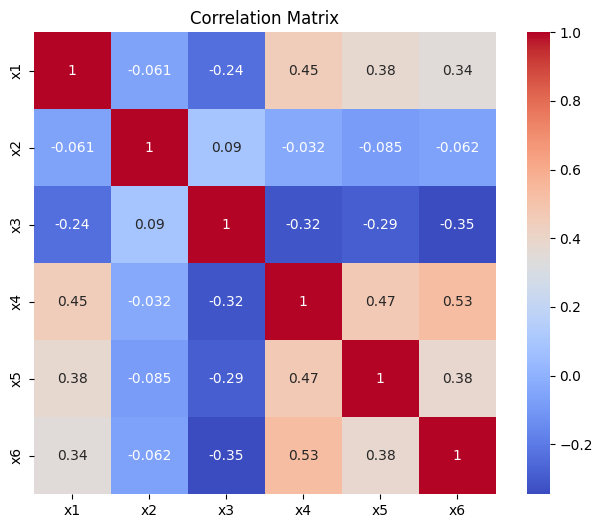

In [33]:
# Построение "тепловой" карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
# Добавление заголовка
plt.title('Correlation Matrix')

In [17]:
# Применение анализа главных компонент
pca = PCA(n_components=6, random_state=234)
pca.fit(df_scaled)

PCA(n_components=6, random_state=234)

In [40]:
# Вариансия и объясненная дисперсия
eig = pd.DataFrame()
eig['pca'] = range(1, 7)
eig['eigenvalue'] = pca.explained_variance_
eig['variance_ratio'] = pca.explained_variance_ratio_

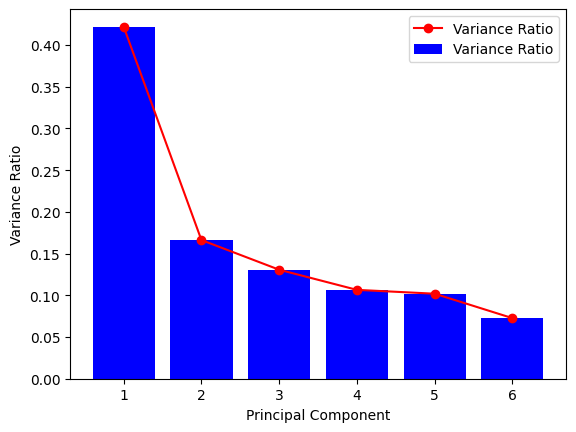

In [19]:
# Визуализация объясненной дисперсии
plt.bar(eig['pca'], eig['variance_ratio'], color='b', label='Variance Ratio')
plt.plot(eig['pca'], eig['variance_ratio'], marker='o', color='r', label='Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.legend()
plt.show()

In [20]:
# Матрица факторных нагрузок
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(6)], index=factor_names)
print(loadings)

         PC1       PC2       PC3       PC4       PC5       PC6
x1  0.424634  0.073558  0.455553 -0.633347 -0.408641  0.196547
x2 -0.093404  0.976382 -0.155246 -0.082745  0.061291  0.057010
x3 -0.367683  0.127974  0.829974  0.394819 -0.017758  0.058108
x4  0.503521  0.143209  0.130884  0.260328 -0.091160 -0.795453
x5  0.450184  0.009327  0.210120 -0.019878  0.839621  0.218491
x6  0.468585  0.065536 -0.135026  0.606611 -0.340098  0.523697


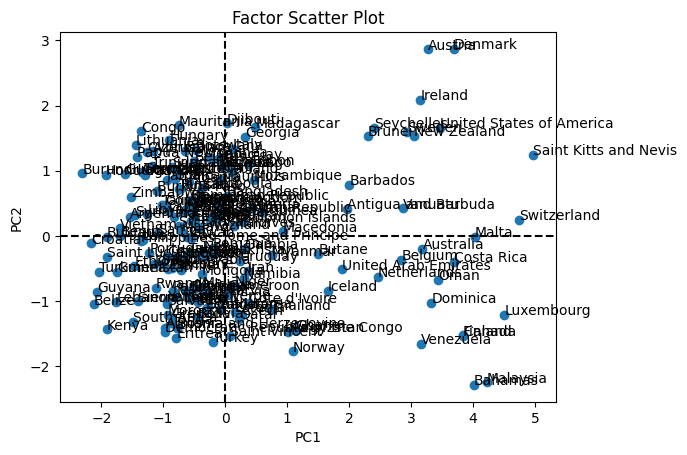

In [21]:
# Визуализация факторной диаграммы рассеяния переменных по первым двум главным компонентам
scores = pd.DataFrame(pca.transform(df_scaled), columns=[f'PC{i+1}' for i in range(6)])
plt.scatter(scores['PC1'], scores['PC2'])
for i, txt in enumerate(df['country']):
    plt.annotate(txt, (scores['PC1'][i], scores['PC2'][i]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Factor Scatter Plot')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.show()

In [34]:
# Кластеризация с использованием метода k-средних
kmeans = KMeans(n_clusters=3, random_state=234)
clusters = kmeans.fit_predict(scores[['PC1', 'PC2']])
df['cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


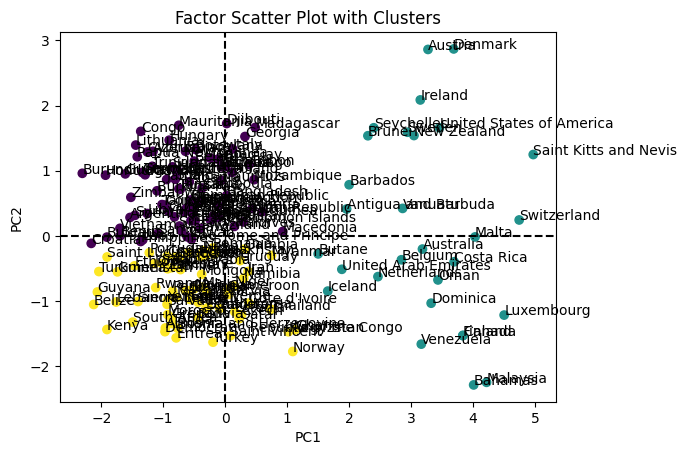

In [35]:
# Визуализация факторной диаграммы рассеяния с учетом кластеров
plt.scatter(scores['PC1'], scores['PC2'], c=clusters, cmap='viridis')
for i, txt in enumerate(df['country']):
    plt.annotate(txt, (scores['PC1'][i], scores['PC2'][i]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Factor Scatter Plot with Clusters')

plt.show()